In [1]:
import time
import random
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def promedio(lista):
    return sum(lista)/len(lista)
def randomquicksort(alist,times):
   comp = [0]
   randomquicksorthelper(alist,0,len(alist)-1,comp)
   times.append(comp[0])



In [3]:
def randomquicksorthelper(alist,first,last,comp):
   if first<last:

       r = randompartition(alist,first,last)
       splitpoint = r[0]
       tmp = comp.pop()
       comp.append(tmp+r[1])
    
       randomquicksorthelper(alist,first,splitpoint-1,comp)
       randomquicksorthelper(alist,splitpoint+1,last,comp)

In [4]:
def randompartition(alist,first,last):
  
   indxpiv = random.randint(first,last)
   temp = alist[indxpiv]
   alist[indxpiv] = alist[first]
   alist[first] = temp
   
   pivotvalue = alist[first]
   compspart = 0

   leftmark = first+1
   rightmark = last

   done = False
   while not done:

       while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
           leftmark = leftmark + 1
           compspart = compspart + 1
       compspart = compspart + 1

       while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
           rightmark = rightmark -1
           compspart = compspart + 1
       compspart = compspart + 1

       if rightmark < leftmark:
           done = True
       else:
           temp = alist[leftmark]
           alist[leftmark] = alist[rightmark]
           alist[rightmark] = temp

   temp = alist[first]
   alist[first] = alist[rightmark]
   alist[rightmark] = temp


   return rightmark,compspart

In [5]:
def randomquicksorttimedistrib(s,r):
    
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
     # Run quicksort for each permutation
    tlist =[]
    tf = []
    timelist = []
    tFinal = []
    for p in range(1,runs+1):
          y = list(x)
          currentT = time.clock()
          randomquicksort(y,tlist)
          timelist.append(time.clock()-currentT)
          if p%30 == 0:
                tf.append(promedio(tlist))
                tFinal.append(promedio(timelist))
                tlist.clear()
                timelist.clear()
          
        
    plt.hist(tf)
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.hist(tFinal, color="green")
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Frequency")
    plt.show()
    
    print("n",n)
    print("runs",runs)
    print("min comp",min(tf))
    print("max comp",max(tf))
    print("prom comp", promedio(tf))
    print("min time",min(tFinal))
    print("max time",max(tFinal))

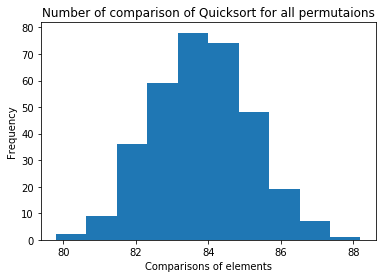

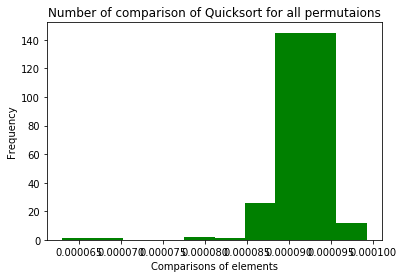

n 16
runs 10000
min comp 79.8
max comp 88.2
prom comp 83.8236236236236
min time 6.299999999999824e-05
max time 9.923333333330397e-05
2.189577


In [6]:
t = time.clock()
randomquicksorttimedistrib(16,10000)
print(time.clock()-t)

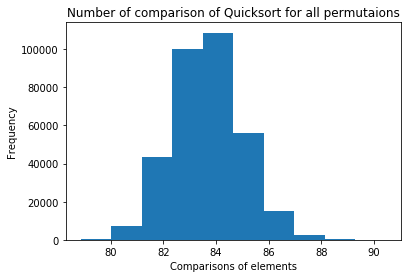

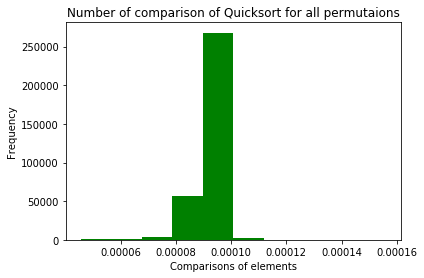

n 16
runs 10000000
min comp 78.86666666666666
max comp 90.43333333333334
prom comp 83.66725706725755
min time 4.57333333315546e-05
max time 0.00015590000000192578
993.296203


In [7]:
t = time.clock()
randomquicksorttimedistrib(16,10000000)
print(time.clock()-t)